In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Data

df = pd.read_csv("stockmarket_prices.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock'], dtype='object')

In [5]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [6]:
# Data Processing
# Feature Scaling

scalar = MinMaxScaler()
df[['Open','High','Low','Close']] = scalar.fit_transform(df[['Open','High','Low','Close']])
df['Volume'] = scalar.fit_transform(df['Volume'].values.reshape(-1,1))


In [7]:
df['Volume']

0        0.011219
1        0.008708
2        0.020533
3        0.017937
4        0.027936
           ...   
19581    0.006414
19582    0.006234
19583    0.005057
19584    0.006089
19585    0.005344
Name: Volume, Length: 19586, dtype: float64

In [8]:
df['Volume'].max()

1.0

In [9]:
df['Open']

0        0.000923
1        0.000923
2        0.000926
3        0.000936
4        0.000962
           ...   
19581    0.461672
19582    0.466689
19583    0.464853
19584    0.461025
19585    0.461129
Name: Open, Length: 19586, dtype: float64

In [10]:
df['Open'].max()

1.0

In [11]:
df['Open'].min()

0.0

In [12]:
df['High']

0        0.000929
1        0.000919
2        0.000948
3        0.000935
4        0.000958
           ...   
19581    0.463063
19582    0.463828
19583    0.462806
19584    0.460367
19585    0.459597
Name: High, Length: 19586, dtype: float64

In [13]:
# Feature Selection

X = df[['Open','High','Low','Close']]
y = df['Volume']


In [14]:
X

,Open,High,Low,Close
0,0.000923,0.000929,0.000927,0.000927
1,0.000923,0.000919,0.000913,0.000920
2,0.000926,0.000948,0.000944,0.000940
3,0.000936,0.000935,0.000920,0.000907
4,0.000962,0.000958,0.000981,0.000967
...,...,...,...,...
19581,0.461672,0.463063,0.469953,0.467881
19582,0.466689,0.463828,0.472835,0.468089
19583,0.464853,0.462806,0.472062,0.466296
19584,0.461025,0.460367,0.466737,0.465621


In [15]:
y

0        0.011219
1        0.008708
2        0.020533
3        0.017937
4        0.027936
           ...   
19581    0.006414
19582    0.006234
19583    0.005057
19584    0.006089
19585    0.005344
Name: Volume, Length: 19586, dtype: float64

In [16]:
# Splitting the data into training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train.count()

Open     15668
High     15668
Low      15668
Close    15668
dtype: int64

In [18]:
X_test.count()

Open     3918
High     3918
Low      3918
Close    3918
dtype: int64

In [19]:
y_train.count()

15668

In [20]:
y_test.count()

3918

In [21]:
# Reshape data to be 3D for LSTM model

from keras.layers import  LSTM

X_train = np.reshape(X_train.values,(X_train.shape[0],X_train.shape[1],1))

X_test = np.reshape(X_test.values,(X_test.shape[0],X_test.shape[1],1))

In [22]:
X_train

array([[[0.00334357],
        [0.00334161],
        [0.00334689],
        [0.00335825]],

       [[0.00071056],
        [0.00070524],
        [0.00069398],
        [0.00069043]],

       [[0.01420661],
        [0.01412168],
        [0.01392884],
        [0.01381124]],

       ...,

       [[0.02504974],
        [0.02598379],
        [0.02547948],
        [0.0256637 ]],

       [[0.00326468],
        [0.00326922],
        [0.00323958],
        [0.00325511]],

       [[0.06532931],
        [0.06569702],
        [0.06641517],
        [0.06609154]]])

In [23]:
# Define LSTM model architecture

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [24]:
# Compile the model

from sklearn.metrics import mean_squared_error

model.compile(loss='mean_squared_error',optimizer = 'adam')

In [25]:
# Train the model

Train_Model = model.fit(X_train,y_train,epochs=60,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
490/490 [==============================] - 15s 13ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/60
490/490 [==============================] - 4s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/60
490/490 [==============================] - 4s 8ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/60
490/490 [==============================] - 5s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/60
490/490 [==============================] - 4s 8ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/60
490/490 [==============================] - 5s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/60
490/490 [==============================] - 5s 9ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/60
490/490 [==============================] - 7s 14ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/60
490/490 [==============================] - 6s 13ms/step - loss: 0.0014 - val_loss: 

In [26]:
# Evaluation of the model

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error is :",rmse)

123/123 [==============================] - 1s 3ms/step
Root_Mean_Squared_Error is : 0.03489119173868933


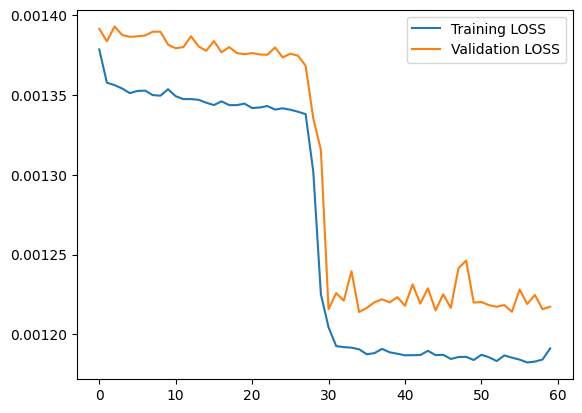

In [27]:
# Visualize training and validation loss


plt.plot(Train_Model.history['loss'],label='Training LOSS' )
plt.plot(Train_Model.history['val_loss'],label='Validation LOSS' )
plt.legend()
plt.show()

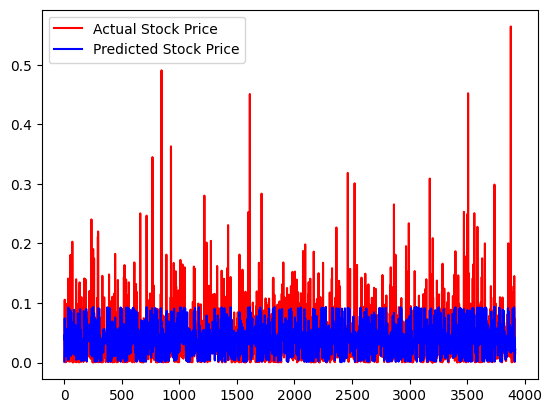

In [28]:
# Visualize actual vs predicted stock prices

plt.plot(y_test.values, color='red', label='Actual Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.legend()
plt.show()
